Import All Libraries

In [26]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd

Read Dataset

In [8]:
import pandas as pd
df = pd.read_csv("video_games_sales.csv").dropna()
print(df.shape)

(6825, 16)


display information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


convert object to float and int datatype

In [10]:
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

create useful columns

In [11]:
useful_cols = ["Name", "Platform", "Year_of_Release", "Genre", "Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count", "Rating"]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


plotting

<Axes: xlabel='Year_of_Release'>

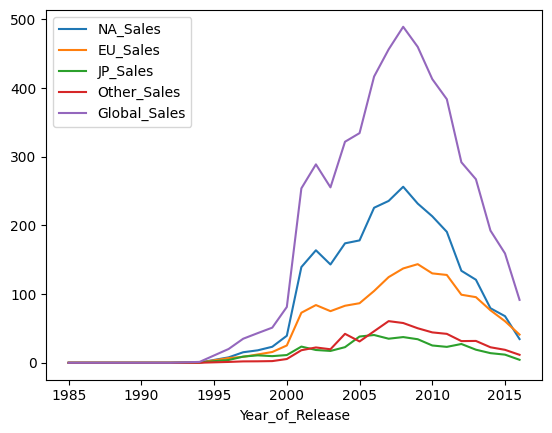

In [12]:
df[[x for x in df.columns if "Sales" in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot()

plotting bar chart

<Axes: xlabel='Year_of_Release'>

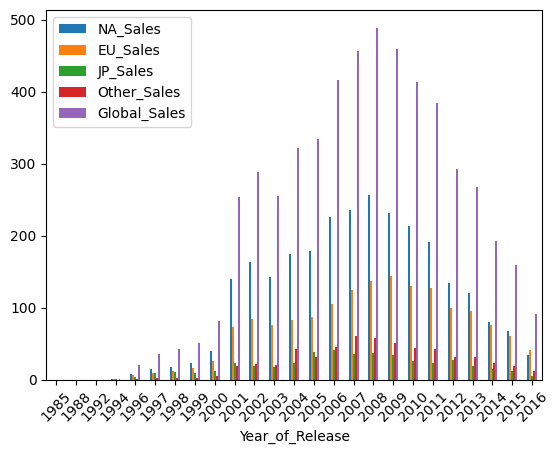

In [13]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby("Year_of_Release").sum().plot(kind="bar", rot=45)

pairplotting char bar

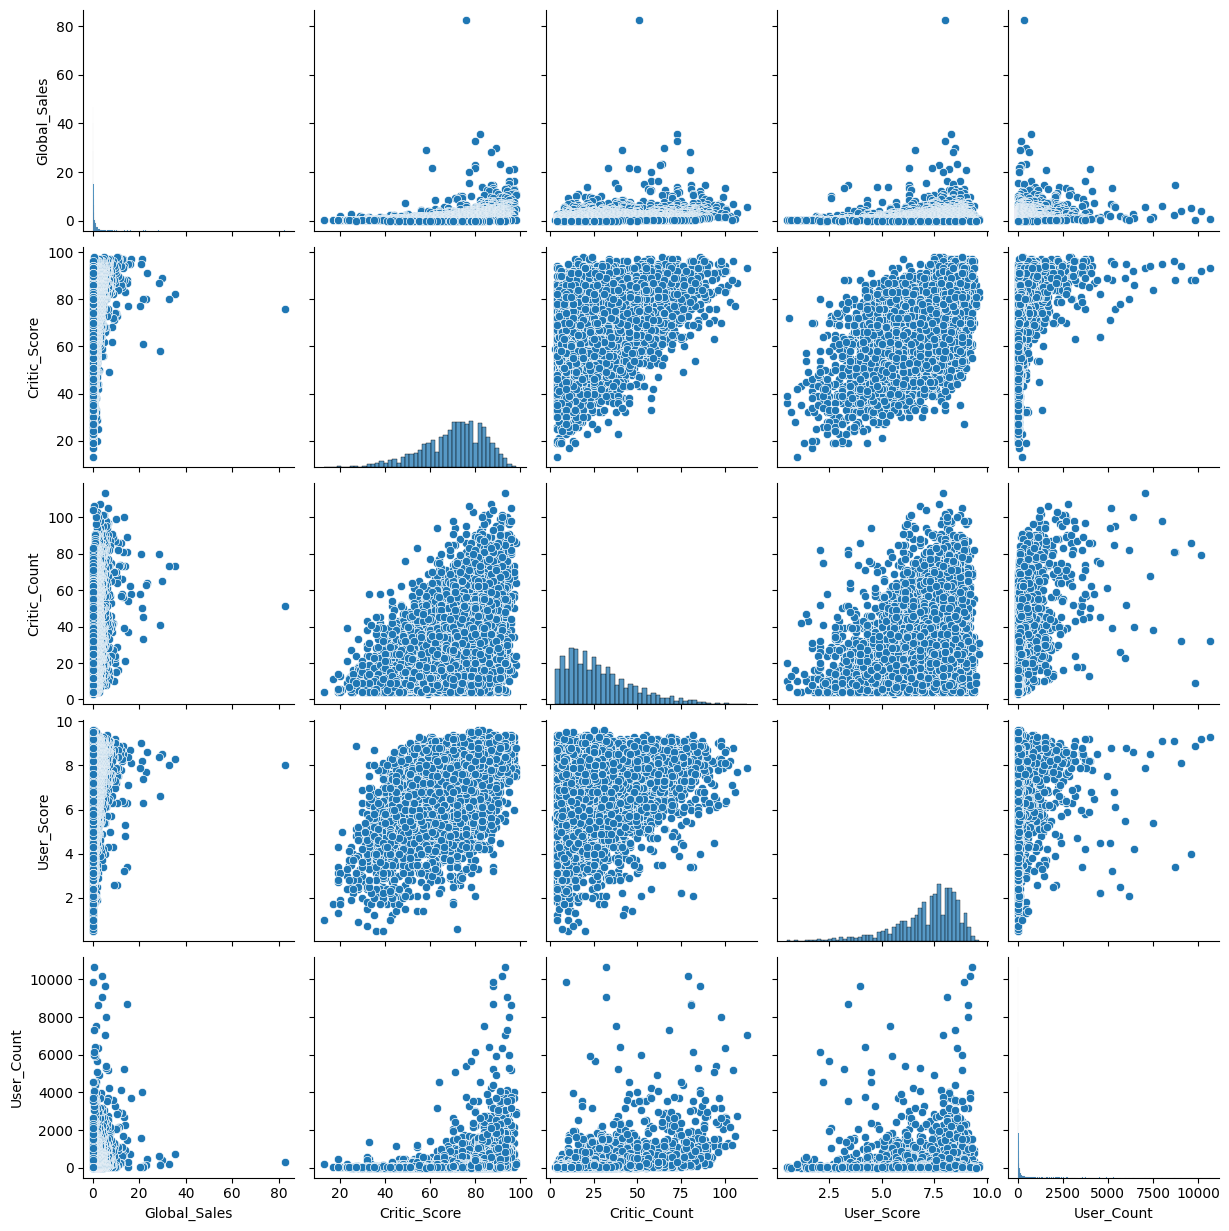

In [14]:
import seaborn as sns
sns.pairplot(df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]])

displot chart bar

<Axes: xlabel='Critic_Count', ylabel='Density'>

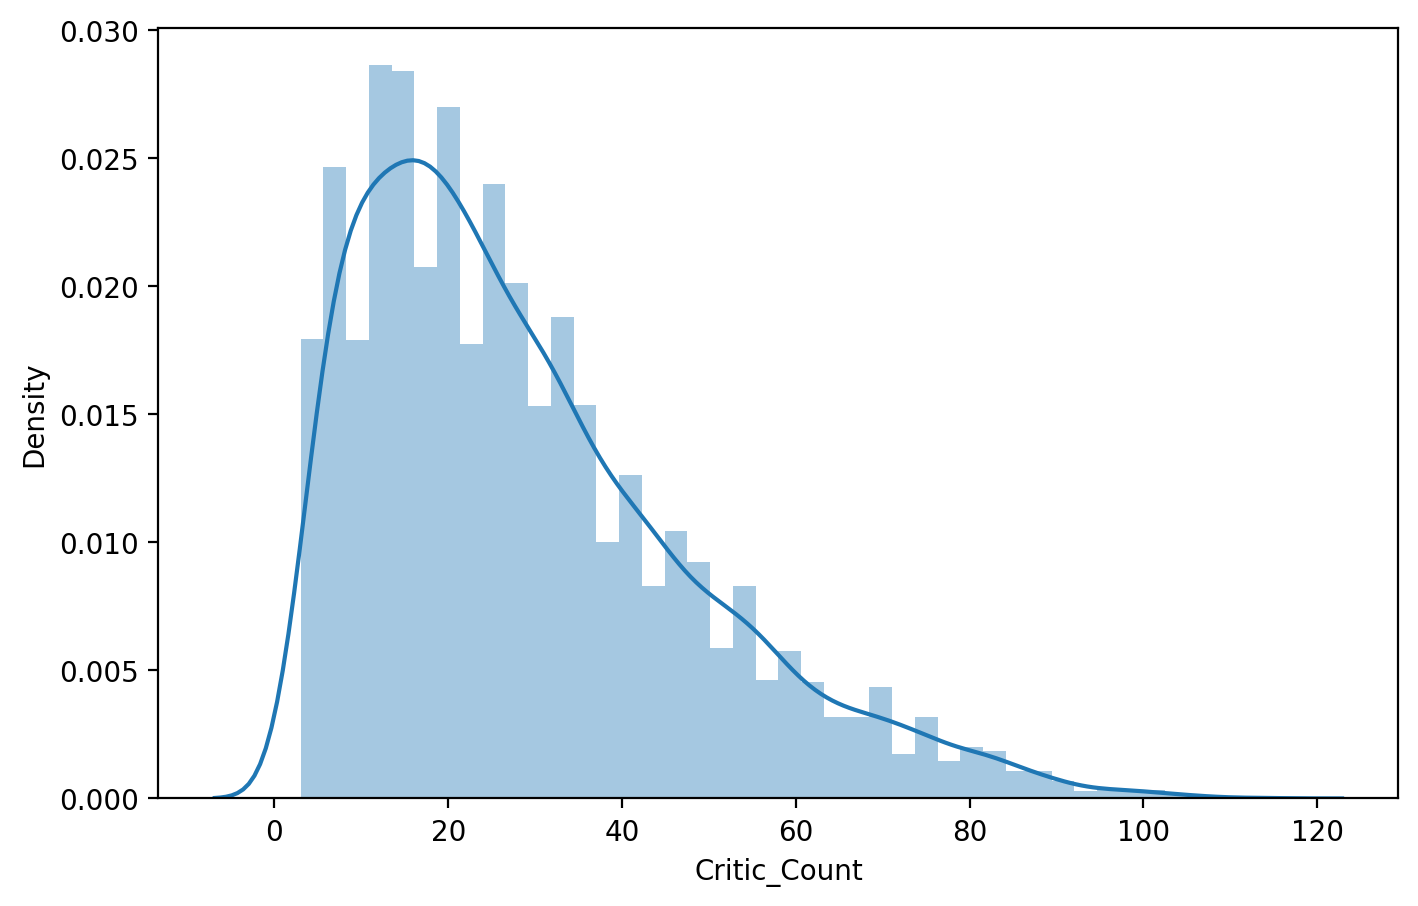

In [27]:
%config InlineBackend.figure_format = 'retina'
sns.distplot(df["Critic_Count"])

jointplot chart bar

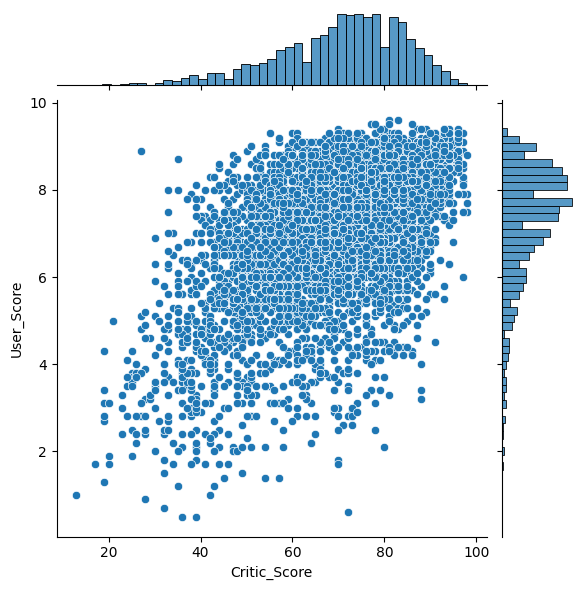

In [16]:
sns.jointplot(x="Critic_Score", y="User_Score", data=df, kind="scatter")

boxplot chart bar

<Axes: xlabel='Critic_Score', ylabel='Platform'>

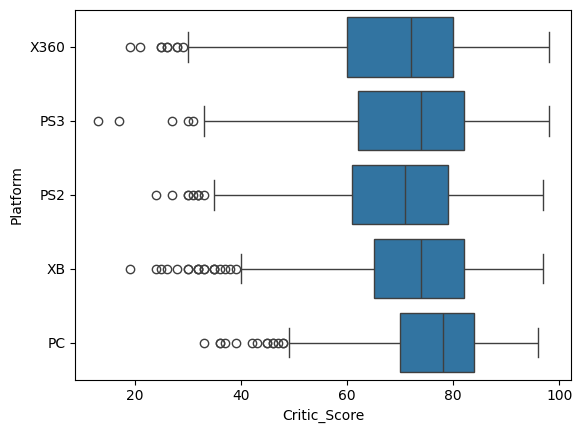

In [17]:
top_platforms = (df["Platform"].value_counts().sort_values(ascending=False).head(5).index.values)
sns.boxplot(
    y="Platform",
    x="Critic_Score",
    data=df[df["Platform"].isin(top_platforms)],
    orient='h'
)

heatmap chart bar

<Axes: xlabel='Genre', ylabel='Platform'>

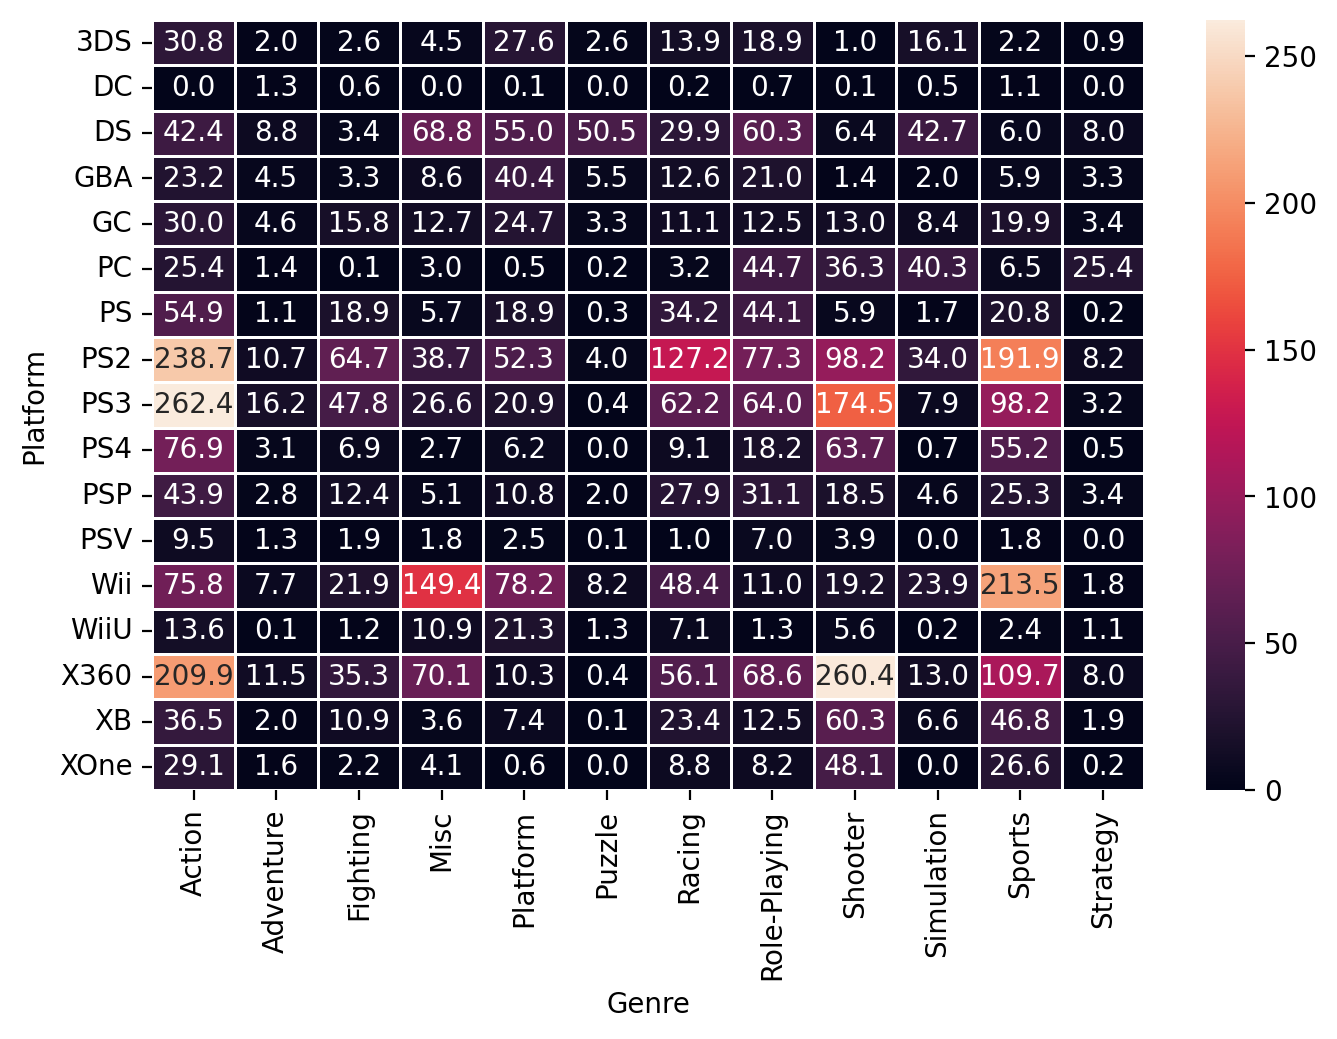

In [28]:
platform_genre_sales = (
    df.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc=sum
    )
    .fillna(0)
    .applymap(float)
)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5)

plotly

In [31]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

line plot

In [30]:
years_df = (df.groupby("Year_of_Release")[["Global_Sales"]].sum().join(df.groupby("Year_of_Release")[["Name"]].count()))
years_df.columns = ["Global_Sales", "Number_of_Games"]

trace chart bar

In [33]:
trace0 = go.Scatter(x=years_df.index, y=years_df["Global_Sales"], name="Global Sales")
trace1 = go.Scatter(x=years_df.index, y=years_df["Number_of_Games"], name="Number of games released")
data = [trace0, trace1]
layout = {"title": "Statistics of video games"}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

bar chart

In [34]:
platforms_df = (
    df.groupby("Platform")[["Global_Sales"]].sum().join(df.groupby("Platform")[["Name"]].count())
)
platforms_df.columns = ["Global_Sales", "Number_of_Games"]
platforms_df.sort_values("Global_Sales", ascending=False, inplace=True)

another trace chart bar

In [35]:
trace0 = go.Scatter(x=years_df.index, y=years_df["Global_Sales"], name="Global Sales")
trace1 = go.Scatter(x=years_df.index, y=years_df["Number_of_Games"], name="Number of games released")
data = [trace0, trace1]
layout = {"title": "Market share by gaming platform"}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

another box plot

In [ ]:
data = []
for genre in df.Genre.unique():
    data.append(go.Box(y=df[df.Genre == genre].Critic_Score, name=genre))
iplot(data, show_link=False)